#Scraping reddit site and running NLP model

In [20]:
pip install -r requirements.txt --quiet

Note: you may need to restart the kernel to use updated packages.


In [21]:
import pandas as pd
import numpy as np
from IPython.display import display
import random as rand
# misc
import datetime as dt
from pprint import pprint
from itertools import chain

# reddit crawler
import praw
from praw.models import MoreComments
# sentiment analysis
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize, RegexpTokenizer # tokenize words
from nltk.corpus import stopwords

# visualization
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 8) # default plot size
import seaborn as sns
sns.set(style='whitegrid', palette='Dark2')
from wordcloud import WordCloud

In [22]:
nltk.download('vader_lexicon') # get lexicons data
nltk.download('punkt') # for tokenizer
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/michaelefseaff/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/michaelefseaff/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/michaelefseaff/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
r = praw.Reddit(user_agent='your_user_name',
                client_id='yFDHmbE_xcg4dXoEoRHvfA',
                client_secret='1_S98ykgranjq-nXpqXDWeWo2XIAYQ',
                check_for_async=False)

In [24]:
def scrape_and_ready_data(reddit_page,post_limit = 100):
  subreddit = r.subreddit(reddit_page)
  page = [*subreddit.top(limit=post_limit)] # top posts all time
  print(reddit_page + ': ' + str(len(page)))
  print(vars(page[0]))
  # create lists of the information from each news
  fullname = []
  title = []
  article = []
  author = []
  dateCreated = []
  numComments = []
  upvotes = []
  totalAwards = []
  domain = []
    

  top_comments = []
  top_comments_upvotes = []
  secondary_comments = []
  secondary_comments_upvotes = []
  third_comments = []
  third_comments_upvotes = []
  i = 0
  for submission in page:
    post = submission
    fullname.append(post.fullname)
    title.append(post.title)
    article.append(post.url)
    author.append(post.author)
    dateCreated.append(dt.datetime.fromtimestamp(post.created))
    numComments.append(post.num_comments)
    upvotes.append(post.score)
    totalAwards.append(post.total_awards_received)
    domain.append(post.domain)


    post.comment_sort = "top"
    post.comments.replace_more(limit=0)
    if post.comments[0].stickied:
      top_comments.append(post.comments[1].body)
      top_comments_upvotes.append(post.comments[1].score)
      secondary_comments.append(post.comments[2].body)
      secondary_comments_upvotes.append(post.comments[2].score)
      third_comments.append(post.comments[3].body)
      third_comments_upvotes.append(post.comments[3].score)
    else:
      top_comments.append(post.comments[0].body)
      top_comments_upvotes.append(post.comments[0].score)
      secondary_comments.append(post.comments[1].body)
      secondary_comments_upvotes.append(post.comments[1].score)
      third_comments.append(post.comments[2].body)
      third_comments_upvotes.append(post.comments[2].score)
    i += 1
    print(i)
  

  page = pd.DataFrame({
    "fullname" : fullname,
    "title": title,
    "article" : article,
    "author" : author,
    "domain" : domain,
    "date_created" : dateCreated,
    "num_comments" : numComments,
    "post_score" : upvotes,
    "total_awards" : totalAwards,
    "top_comment" : top_comments,
    "top_comment_score" : top_comments_upvotes,
    "second_comment" : secondary_comments,
    "second_comment_score" : secondary_comments_upvotes,
    "third_comment" : third_comments,
    "third_comment_score" : third_comments_upvotes,
  })
  display(page.head())
  return page


In [25]:
worldnews = scrape_and_ready_data('worldnews')

worldnews: 100
{'comment_limit': 2048, 'comment_sort': 'confidence', '_reddit': <praw.reddit.Reddit object at 0x13f02c910>, 'approved_at_utc': None, 'subreddit': Subreddit(display_name='worldnews'), 'selftext': '', 'author_fullname': 't2_2brvvn9o', 'saved': False, 'mod_reason_title': None, 'gilded': 2, 'clicked': False, 'title': 'An anti-gay Hungarian politician has resigned after being caught by police fleeing a 25-man orgy through a window', 'link_flair_richtext': [], 'subreddit_name_prefixed': 'r/worldnews', 'hidden': False, 'pwls': 6, 'link_flair_css_class': None, 'downs': 0, 'top_awarded_type': None, 'hide_score': False, 'name': 't3_k4qide', 'quarantine': False, 'link_flair_text_color': 'dark', 'upvote_ratio': 0.93, 'author_flair_background_color': None, 'subreddit_type': 'public', 'ups': 204543, 'total_awards_received': 0, 'media_embed': {}, 'author_flair_template_id': None, 'is_original_content': False, 'user_reports': [], 'secure_media': None, 'is_reddit_media_domain': False, '

,fullname,title,article,author,domain,date_created,num_comments,post_score,total_awards,top_comment,top_comment_score,second_comment,second_comment_score,third_comment,third_comment_score
0,t3_k4qide,An anti-gay Hungarian politician has resigned ...,https://www.businessinsider.com/hungarian-mep-...,stem12345679,businessinsider.com,2020-12-01 10:15:32,8437,204543,0,"Officers, thank god you're here! Those men, th...",33800,25 men is a lot of men for a homophobe,26571,> A source in the local police told the newspa...,20222
1,t3_eclwg9,Trump Impeached for Abuse of Power,https://www.nytimes.com/interactive/2019/12/18...,MachoNachoTaco,nytimes.com,2019-12-18 17:23:35,20128,202901,0,UPDATE: vote on impeachment for Obstruction of...,25989,Friendly reminder to vote in the next election...,20403,Okay for everyone wondering what impeachment i...,15940
2,t3_t3pgaz,Vladimir Putin's black belt revoked by interna...,https://www.newsweek.com/vladimir-putins-black...,bichonista,newsweek.com,2022-02-28 12:45:18,6961,200153,0,That’s the funniest sanction I’ve ever seen,37491,The sanctions are getting fucking brutal,36525,I'm sorry I know the situation is serious but ...,10933
3,t3_901p5f,"Two weeks before his inauguration, Donald J. T...",https://www.nytimes.com/2018/07/18/world/europ...,DoremusJessup,nytimes.com,2018-07-18 19:06:35,18086,189349,0,This seems like kind of a big deal.,25333,It still baffles me this is real life.,16727,Upvote this shit to the top so everyone knows ...,14605
4,t3_x96k3v,"Queen Elizabeth II has died, Buckingham Palace...",https://www.bbc.co.uk/news/uk-61585886,pipsdontsqueak,bbc.co.uk,2022-09-08 10:32:06,16767,188705,0,She reigned for 30% of the existence of the Un...,20625,It is so weird hearing the BBC reporters talki...,20507,"Queen's first PM was Churchill, who was born 1...",18838


In [26]:
sid = SentimentIntensityAnalyzer()

In [27]:
def generate_polarity_scores(page_dataframe):
  res = [*page_dataframe['title'].apply(sid.polarity_scores)]
  sentiment_df = pd.DataFrame.from_records(res)
  page_dataframe = pd.concat([page_dataframe, sentiment_df], axis=1, join='inner')
  display(page_dataframe.head())
  return page_dataframe

In [28]:
worldnews = generate_polarity_scores(worldnews)

,fullname,title,article,author,domain,date_created,num_comments,post_score,total_awards,top_comment,top_comment_score,second_comment,second_comment_score,third_comment,third_comment_score,neg,neu,pos,compound
0,t3_k4qide,An anti-gay Hungarian politician has resigned ...,https://www.businessinsider.com/hungarian-mep-...,stem12345679,businessinsider.com,2020-12-01 10:15:32,8437,204543,0,"Officers, thank god you're here! Those men, th...",33800,25 men is a lot of men for a homophobe,26571,> A source in the local police told the newspa...,20222,0.118,0.882,0.000,-0.2500
1,t3_eclwg9,Trump Impeached for Abuse of Power,https://www.nytimes.com/interactive/2019/12/18...,MachoNachoTaco,nytimes.com,2019-12-18 17:23:35,20128,202901,0,UPDATE: vote on impeachment for Obstruction of...,25989,Friendly reminder to vote in the next election...,20403,Okay for everyone wondering what impeachment i...,15940,0.457,0.543,0.000,-0.6369
2,t3_t3pgaz,Vladimir Putin's black belt revoked by interna...,https://www.newsweek.com/vladimir-putins-black...,bichonista,newsweek.com,2022-02-28 12:45:18,6961,200153,0,That’s the funniest sanction I’ve ever seen,37491,The sanctions are getting fucking brutal,36525,I'm sorry I know the situation is serious but ...,10933,0.000,1.000,0.000,0.0000
3,t3_901p5f,"Two weeks before his inauguration, Donald J. T...",https://www.nytimes.com/2018/07/18/world/europ...,DoremusJessup,nytimes.com,2018-07-18 19:06:35,18086,189349,0,This seems like kind of a big deal.,25333,It still baffles me this is real life.,16727,Upvote this shit to the top so everyone knows ...,14605,0.000,0.902,0.098,0.5233
4,t3_x96k3v,"Queen Elizabeth II has died, Buckingham Palace...",https://www.bbc.co.uk/news/uk-61585886,pipsdontsqueak,bbc.co.uk,2022-09-08 10:32:06,16767,188705,0,She reigned for 30% of the existence of the Un...,20625,It is so weird hearing the BBC reporters talki...,20507,"Queen's first PM was Churchill, who was born 1...",18838,0.340,0.660,0.000,-0.5574


In [29]:
def add_sentiment_labels(page_dataframe, threshold = 0.05):

  conditions = [
    (page_dataframe['compound'] <= -threshold),
    (page_dataframe['compound'] > -threshold) & (page_dataframe['compound'] < threshold),
    (page_dataframe['compound'] >= threshold),
    ]

  values = ["neg", "neu", "pos"]
  page_dataframe['label'] = np.select(conditions, values)

  display(page_dataframe.head())
  return page_dataframe

In [30]:
worldnews = add_sentiment_labels(worldnews)

,fullname,title,article,author,domain,date_created,num_comments,post_score,total_awards,top_comment,top_comment_score,second_comment,second_comment_score,third_comment,third_comment_score,neg,neu,pos,compound,label
0,t3_k4qide,An anti-gay Hungarian politician has resigned ...,https://www.businessinsider.com/hungarian-mep-...,stem12345679,businessinsider.com,2020-12-01 10:15:32,8437,204543,0,"Officers, thank god you're here! Those men, th...",33800,25 men is a lot of men for a homophobe,26571,> A source in the local police told the newspa...,20222,0.118,0.882,0.000,-0.2500,neg
1,t3_eclwg9,Trump Impeached for Abuse of Power,https://www.nytimes.com/interactive/2019/12/18...,MachoNachoTaco,nytimes.com,2019-12-18 17:23:35,20128,202901,0,UPDATE: vote on impeachment for Obstruction of...,25989,Friendly reminder to vote in the next election...,20403,Okay for everyone wondering what impeachment i...,15940,0.457,0.543,0.000,-0.6369,neg
2,t3_t3pgaz,Vladimir Putin's black belt revoked by interna...,https://www.newsweek.com/vladimir-putins-black...,bichonista,newsweek.com,2022-02-28 12:45:18,6961,200153,0,That’s the funniest sanction I’ve ever seen,37491,The sanctions are getting fucking brutal,36525,I'm sorry I know the situation is serious but ...,10933,0.000,1.000,0.000,0.0000,neu
3,t3_901p5f,"Two weeks before his inauguration, Donald J. T...",https://www.nytimes.com/2018/07/18/world/europ...,DoremusJessup,nytimes.com,2018-07-18 19:06:35,18086,189349,0,This seems like kind of a big deal.,25333,It still baffles me this is real life.,16727,Upvote this shit to the top so everyone knows ...,14605,0.000,0.902,0.098,0.5233,pos
4,t3_x96k3v,"Queen Elizabeth II has died, Buckingham Palace...",https://www.bbc.co.uk/news/uk-61585886,pipsdontsqueak,bbc.co.uk,2022-09-08 10:32:06,16767,188705,0,She reigned for 30% of the existence of the Un...,20625,It is so weird hearing the BBC reporters talki...,20507,"Queen's first PM was Churchill, who was born 1...",18838,0.340,0.660,0.000,-0.5574,neg


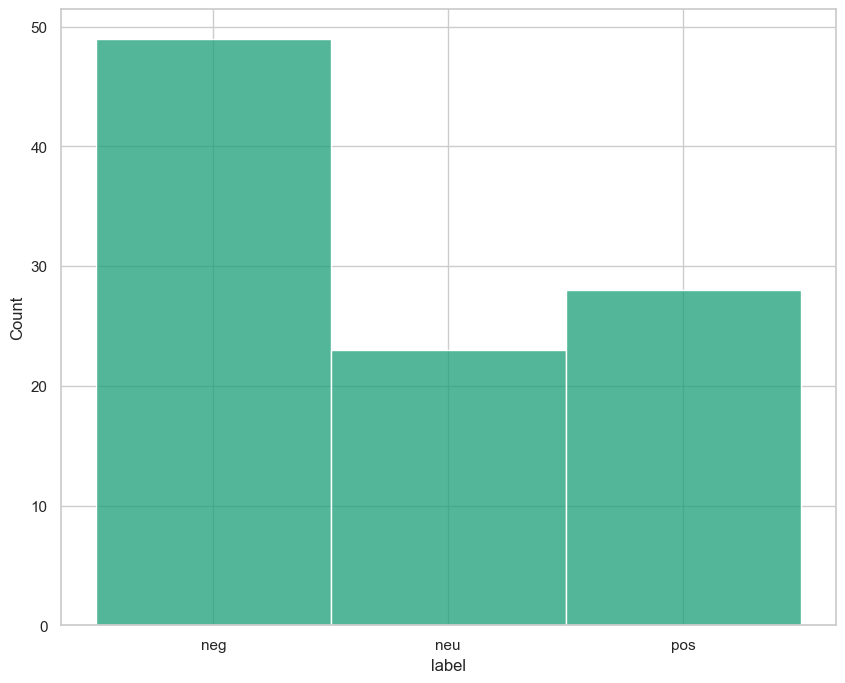

In [31]:
sns.histplot(worldnews.label);


In [34]:
#from google.colab import files

worldnews.to_csv('worldnews.csv')
#files.download('worldnews.csv')